In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import scipy.stats as ss

## EDA

In [2]:
train = pd.read_csv('prep0122255_train.csv')
train.head(5)
train = train.drop(train.columns[0], axis=1)
train

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,Developing,73.3,127.0,43.0,0.9,93.0,86.0,11568.111100,0.741,14.0
1,Developing,56.9,436.0,33.7,13.4,96.0,96.0,5714.479370,0.630,12.1
2,Developing,63.5,241.0,35.0,2.1,84.0,84.0,1862.167274,0.470,6.3
3,Developed,79.4,85.0,57.5,0.1,99.0,99.0,89739.711700,0.880,13.5
4,Developing,74.5,14.0,55.0,0.1,94.0,94.0,3161.529350,0.798,12.0
...,...,...,...,...,...,...,...,...,...,...
1759,Developing,74.4,111.0,49.2,0.1,85.0,85.0,1657.322800,0.775,15.3
1760,Developing,63.8,247.0,18.9,1.3,97.0,93.0,617.317648,0.464,10.2
1761,Developing,69.7,28.0,48.2,2.0,87.0,86.0,3681.599300,0.668,12.6
1762,Developed,79.7,82.0,57.9,0.1,99.0,96.0,1618.492800,0.877,13.5


In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1764 non-null   object 
 1   Life expectancy                  1764 non-null   float64
 2   Adult Mortality                  1764 non-null   float64
 3   BMI                              1764 non-null   float64
 4   HIV/AIDS                         1764 non-null   float64
 5   Diphtheria                       1764 non-null   float64
 6   Polio                            1764 non-null   float64
 7   GDP                              1764 non-null   float64
 8   Income composition of resources  1764 non-null   float64
 9   Schooling                        1764 non-null   float64
dtypes: float64(9), object(1)
memory usage: 137.9+ KB
None


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Life expectancy,1764.0,69.593651,9.610978,39.00000,63.500000,72.400000,76.100000,89.0000
Adult Mortality,1764.0,159.693311,125.207161,1.00000,69.000000,135.000000,221.000000,723.0000
BMI,1764.0,38.558503,19.791448,1.40000,19.500000,44.200000,56.225000,77.6000
HIV/AIDS,1764.0,1.807370,5.171301,0.10000,0.100000,0.100000,0.800000,50.3000
Diphtheria,1764.0,83.147959,22.756777,2.00000,80.500000,93.000000,97.000000,99.0000
Polio,1764.0,83.202948,22.478721,3.00000,78.750000,93.000000,97.000000,99.0000
GDP,1764.0,7624.314387,14706.912934,1.68135,472.954181,1846.393295,5935.136533,119172.7418
Income composition of resources,1764.0,0.636972,0.208750,0.00000,0.501000,0.687000,0.788000,0.9480
Schooling,1764.0,12.212925,3.229011,0.00000,10.300000,12.400000,14.500000,20.7000


In [5]:
print("Null values:\n", train.isnull().sum())

Null values:
 Status                             0
Life expectancy                    0
Adult Mortality                    0
BMI                                0
HIV/AIDS                           0
Diphtheria                         0
Polio                              0
GDP                                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [6]:
print("Percent missingness:\n", train.isnull().sum() / train.count())

Percent missingness:
 Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
BMI                                0.0
HIV/AIDS                           0.0
Diphtheria                         0.0
Polio                              0.0
GDP                                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64


In [7]:
print("Shape:\n", train.shape)

Shape:
 (1764, 10)


In [8]:
print("Data Types:\n", train.dtypes)

Data Types:
 Status                              object
Life expectancy                    float64
Adult Mortality                    float64
BMI                                float64
HIV/AIDS                           float64
Diphtheria                         float64
Polio                              float64
GDP                                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [9]:
corrMatrix = train.corr()
corrMatrix.style.background_gradient(cmap='plasma', low=.5, high=0).highlight_null('red')

,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
Life expectancy,1.000000,-0.680039,0.579843,-0.573809,0.460227,0.454672,0.452266,0.735329,0.765111
Adult Mortality,-0.680039,1.000000,-0.373460,0.558935,-0.235285,-0.235386,-0.287016,-0.447513,-0.435558
BMI,0.579843,-0.373460,1.000000,-0.249146,0.270032,0.262376,0.286214,0.536440,0.590213
HIV/AIDS,-0.573809,0.558935,-0.249146,1.000000,-0.156163,-0.156732,-0.134290,-0.264786,-0.239596
Diphtheria,0.460227,-0.235285,0.270032,-0.156163,1.000000,0.660510,0.191819,0.406000,0.442732
Polio,0.454672,-0.235386,0.262376,-0.156732,0.660510,1.000000,0.202257,0.385762,0.434624
GDP,0.452266,-0.287016,0.286214,-0.134290,0.191819,0.202257,1.000000,0.456435,0.449135
Income composition of resources,0.735329,-0.447513,0.536440,-0.264786,0.406000,0.385762,0.456435,1.000000,0.797092
Schooling,0.765111,-0.435558,0.590213,-0.239596,0.442732,0.434624,0.449135,0.797092,1.000000


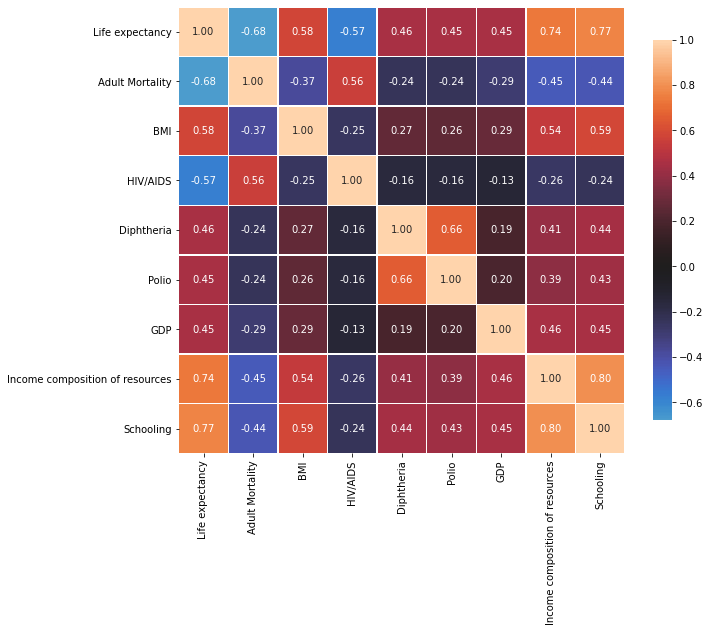

In [10]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train)

In [11]:
train.columns

Index(['Status', 'Life expectancy', 'Adult Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [12]:
train['Status'].value_counts()

Developing    1432
Developed      332
Name: Status, dtype: int64

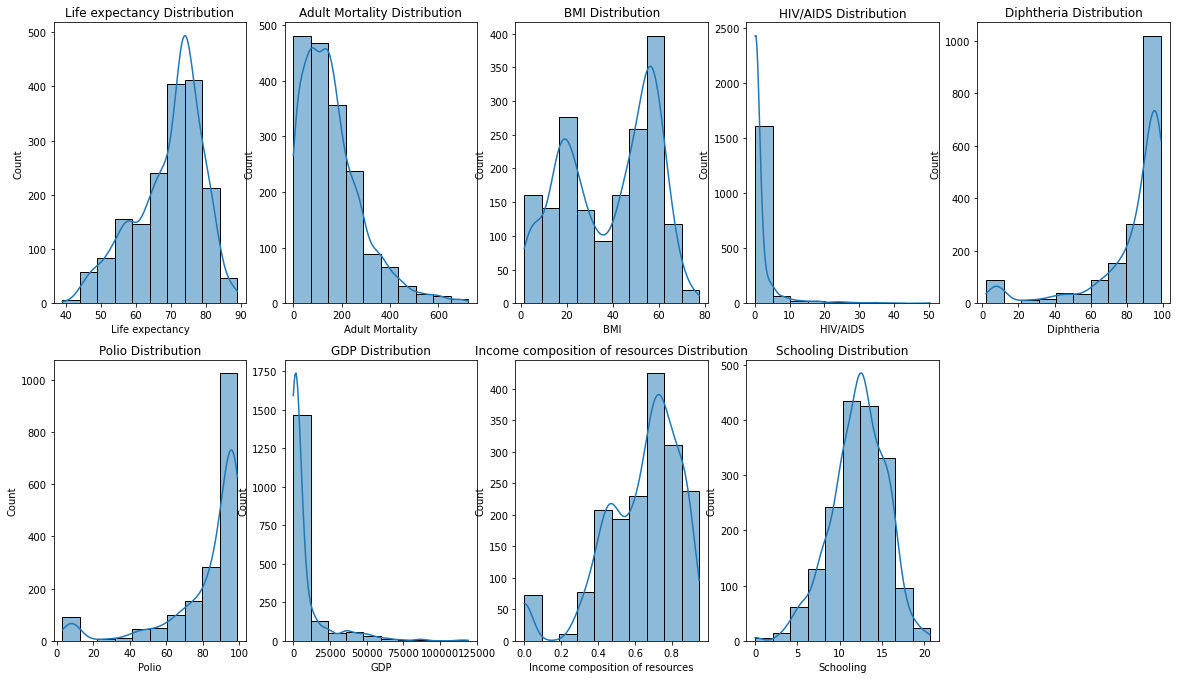

In [13]:
col=['Life expectancy', 'Adult Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income composition of resources',
       'Schooling']

dic={}

for i in range(len(col)):
    dic[col[i]]=i+1

plt.figure(figsize=(20,30))

for key,val in dic.items():
    plt.subplot(5,5,val)
    sns.histplot(x=train[key],data=train,bins=10,kde=True)
    plt.xlabel(key)
    plt.title(key+' Distribution')

plt.show()

## outliers 

In [14]:
#printing out the number of outliers and its percentage

def outlier_count(col, data=train):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

for col in col:
    outlier_count(col)

---------------Life expectancy---------------
Number of outliers: 13
Percent of data that is outlier: 0.74%
---------------Adult Mortality---------------
Number of outliers: 57
Percent of data that is outlier: 3.23%
---------------BMI---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------HIV/AIDS---------------
Number of outliers: 325
Percent of data that is outlier: 18.42%
---------------Diphtheria---------------
Number of outliers: 181
Percent of data that is outlier: 10.26%
---------------Polio---------------
Number of outliers: 156
Percent of data that is outlier: 8.84%
---------------GDP---------------
Number of outliers: 258
Percent of data that is outlier: 14.63%
---------------Income composition of resources---------------
Number of outliers: 73
Percent of data that is outlier: 4.14%
---------------Schooling---------------
Number of outliers: 19
Percent of data that is outlier: 1.08%


In [15]:
#renaming the columns 
train.rename(columns={"Life expectancy":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "Income composition of resources":"Income_Comp_Of_Resources"},inplace=True)
# train.columns

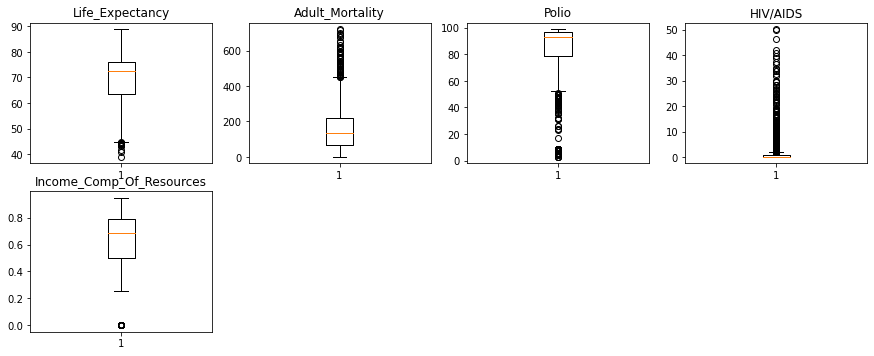

In [16]:
#checking outliers in the dataset 
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(train[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [17]:
features_with_outliers = [ 'Life_Expectancy', 'Adult_Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income_Comp_Of_Resources', 'Schooling']
for feature in features_with_outliers:
    q1 = train[feature].quantile(0.25)#the median of the lower half 
    q3 = train[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    train.loc[train[feature]<lower_limit,feature] = lower_limit
    train.loc[train[feature]>upper_limit,feature] = upper_limit

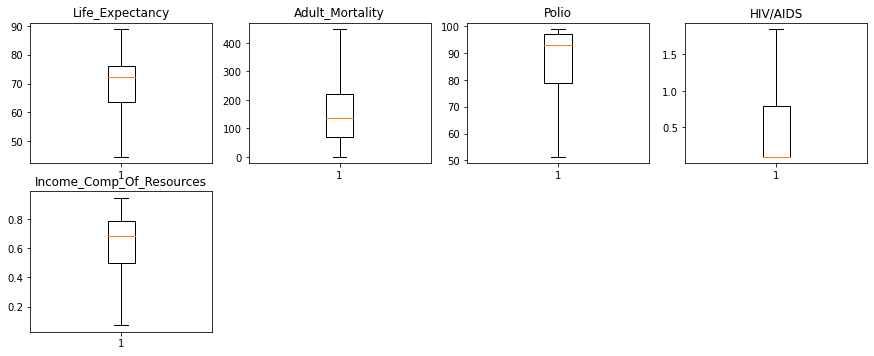

In [18]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(train[variable],whis=1.5)
                     plt.title(variable)

plt.show()

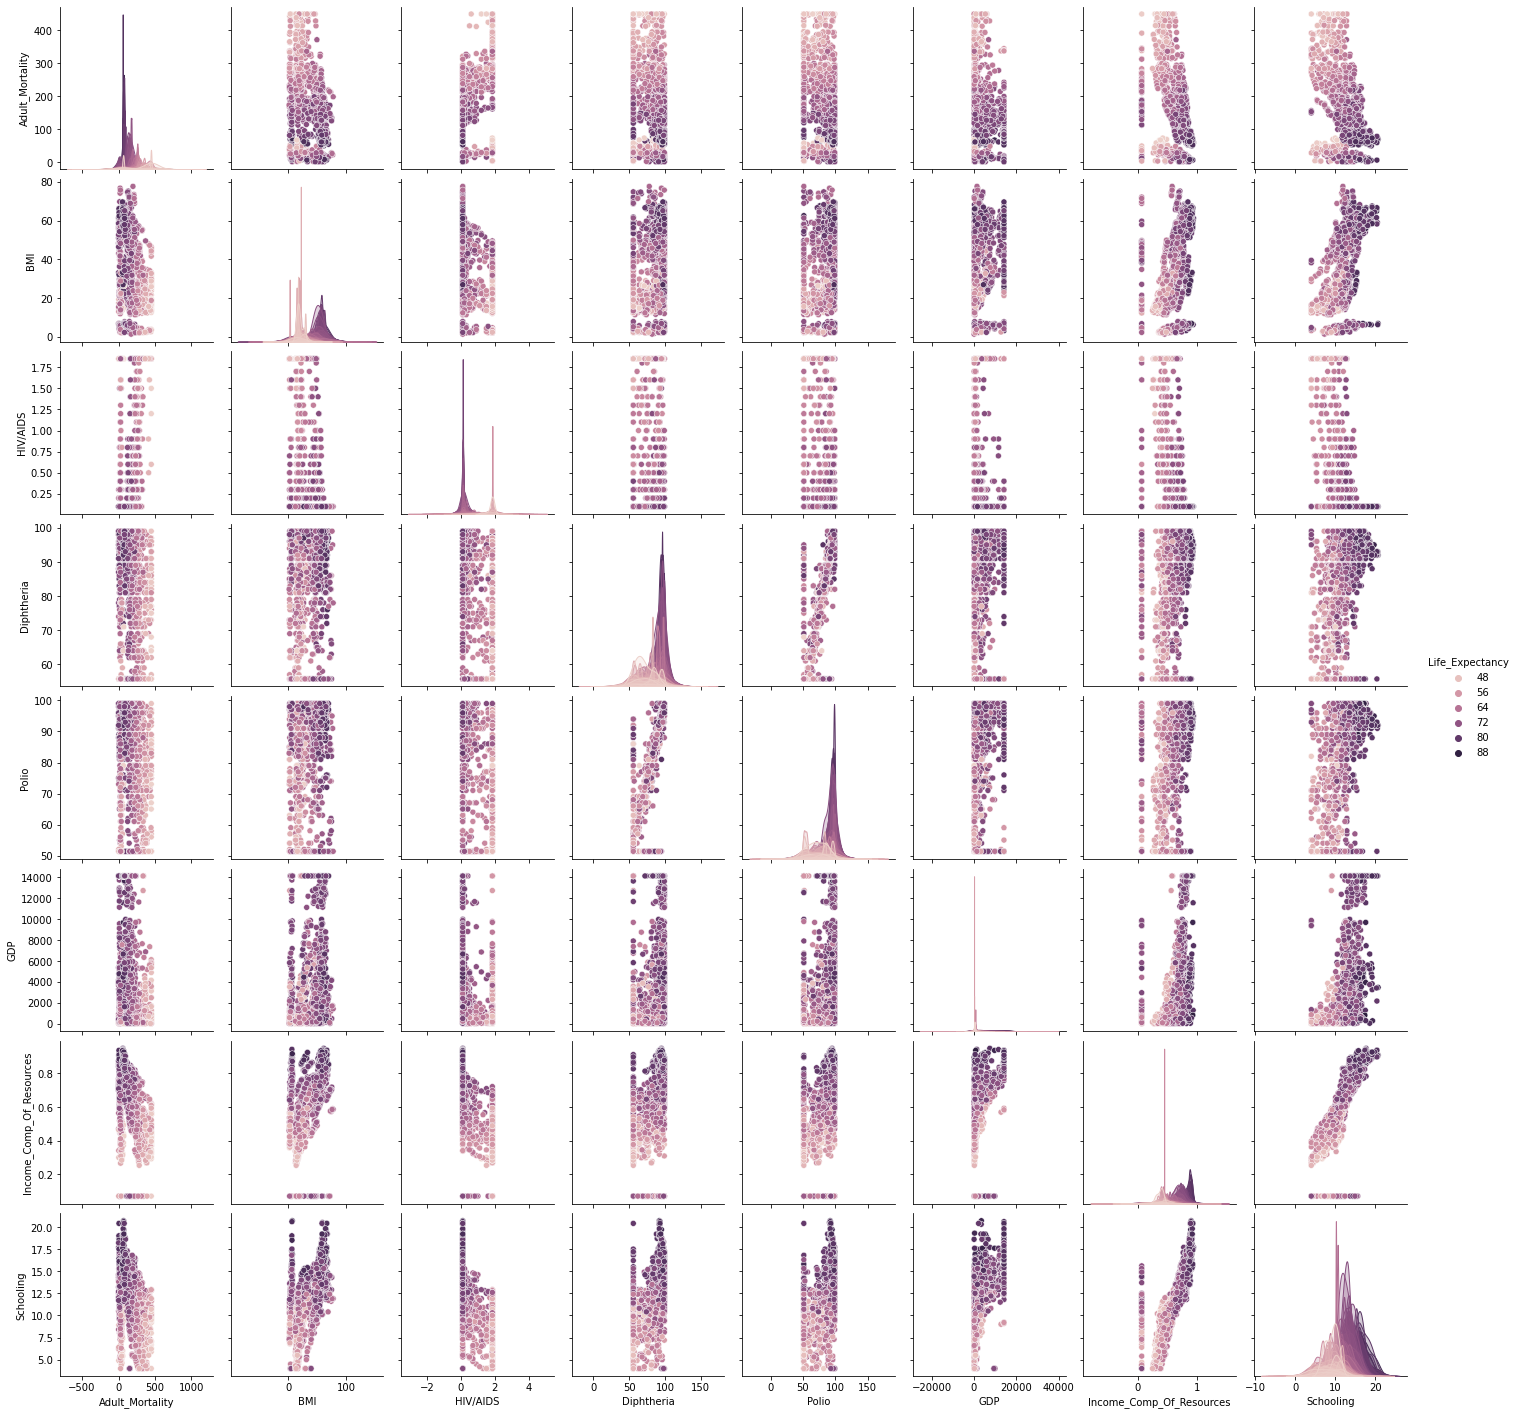

In [19]:
sns.pairplot(train, hue = 'Life_Expectancy')

## Test Data

In [20]:
test = pd.read_csv('prep0122255_test.csv')
# test.head(5)
test = test.drop(test.columns[0], axis=1)
test

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,Developing,75.7,13.0,59.4,0.1,95.0,95.0,7748.123310,0.738,12.5
1,Developing,69.0,265.0,15.8,0.6,85.0,8.0,274.819723,0.473,8.9
2,Developing,72.6,11.0,45.0,0.1,97.0,97.0,1175.788981,0.656,10.7
3,Developing,73.7,133.0,32.5,0.1,97.0,97.0,7269.171140,0.736,12.3
4,Developing,63.3,241.0,16.4,1.2,69.0,7.0,468.567249,0.422,8.4
...,...,...,...,...,...,...,...,...,...,...
436,Developing,75.0,138.0,5.5,0.5,94.0,94.0,4682.728424,0.721,12.7
437,Developed,81.9,7.0,23.4,0.1,97.0,97.0,3488.399200,0.863,14.8
438,Developing,74.5,128.0,54.4,0.1,93.0,94.0,4274.376857,0.755,13.5
439,Developed,81.1,7.0,65.9,0.1,93.0,93.0,3997.256240,0.904,19.5


In [21]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           441 non-null    object 
 1   Life expectancy                  441 non-null    float64
 2   Adult Mortality                  441 non-null    float64
 3   BMI                              441 non-null    float64
 4   HIV/AIDS                         441 non-null    float64
 5   Diphtheria                       441 non-null    float64
 6   Polio                            441 non-null    float64
 7   GDP                              441 non-null    float64
 8   Income composition of resources  441 non-null    float64
 9   Schooling                        441 non-null    float64
dtypes: float64(9), object(1)
memory usage: 34.6+ KB
None


In [22]:
print("Null values:\n", test.isnull().sum())

Null values:
 Status                             0
Life expectancy                    0
Adult Mortality                    0
BMI                                0
HIV/AIDS                           0
Diphtheria                         0
Polio                              0
GDP                                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [23]:
print("Shape:\n", test.shape)

Shape:
 (441, 10)


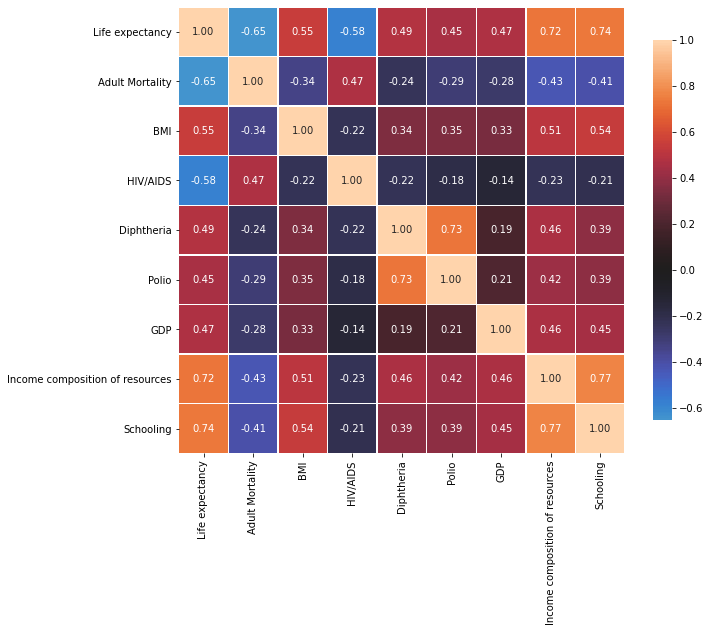

In [24]:
def correlation_heatmap(test):
    correlations = test.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(test)

In [25]:
#renaming the columns 
test.rename(columns={"Life expectancy":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "Income composition of resources":"Income_Comp_Of_Resources"},inplace=True)
test.columns

Index(['Status', 'Life_Expectancy', 'Adult_Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

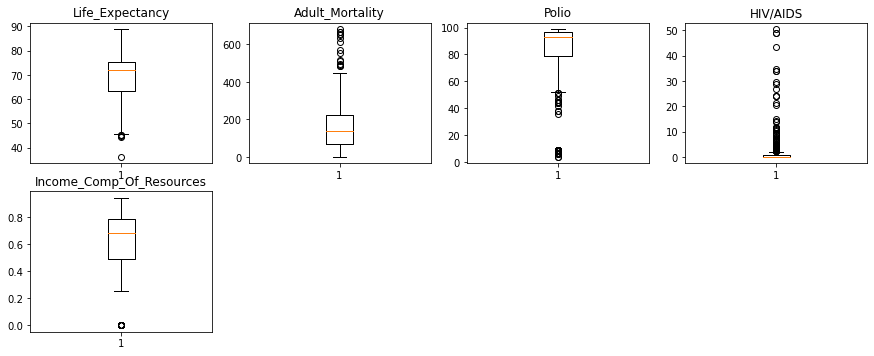

In [26]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(test[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [27]:
features_with_outliers = [ 'Life_Expectancy', 'Adult_Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income_Comp_Of_Resources', 'Schooling']
for feature in features_with_outliers:
    q1 = test[feature].quantile(0.25)#the median of the lower half 
    q3 = test[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    test.loc[test[feature]<lower_limit,feature] = lower_limit
    test.loc[test[feature]>upper_limit,feature] = upper_limit

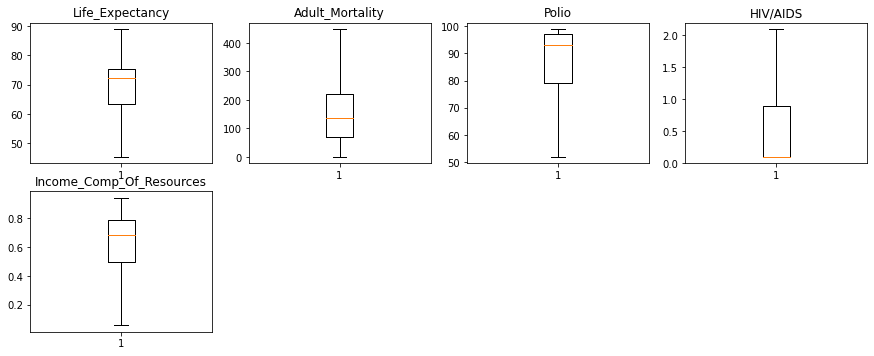

In [28]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(test[variable],whis=1.5)
                     plt.title(variable)

plt.show()

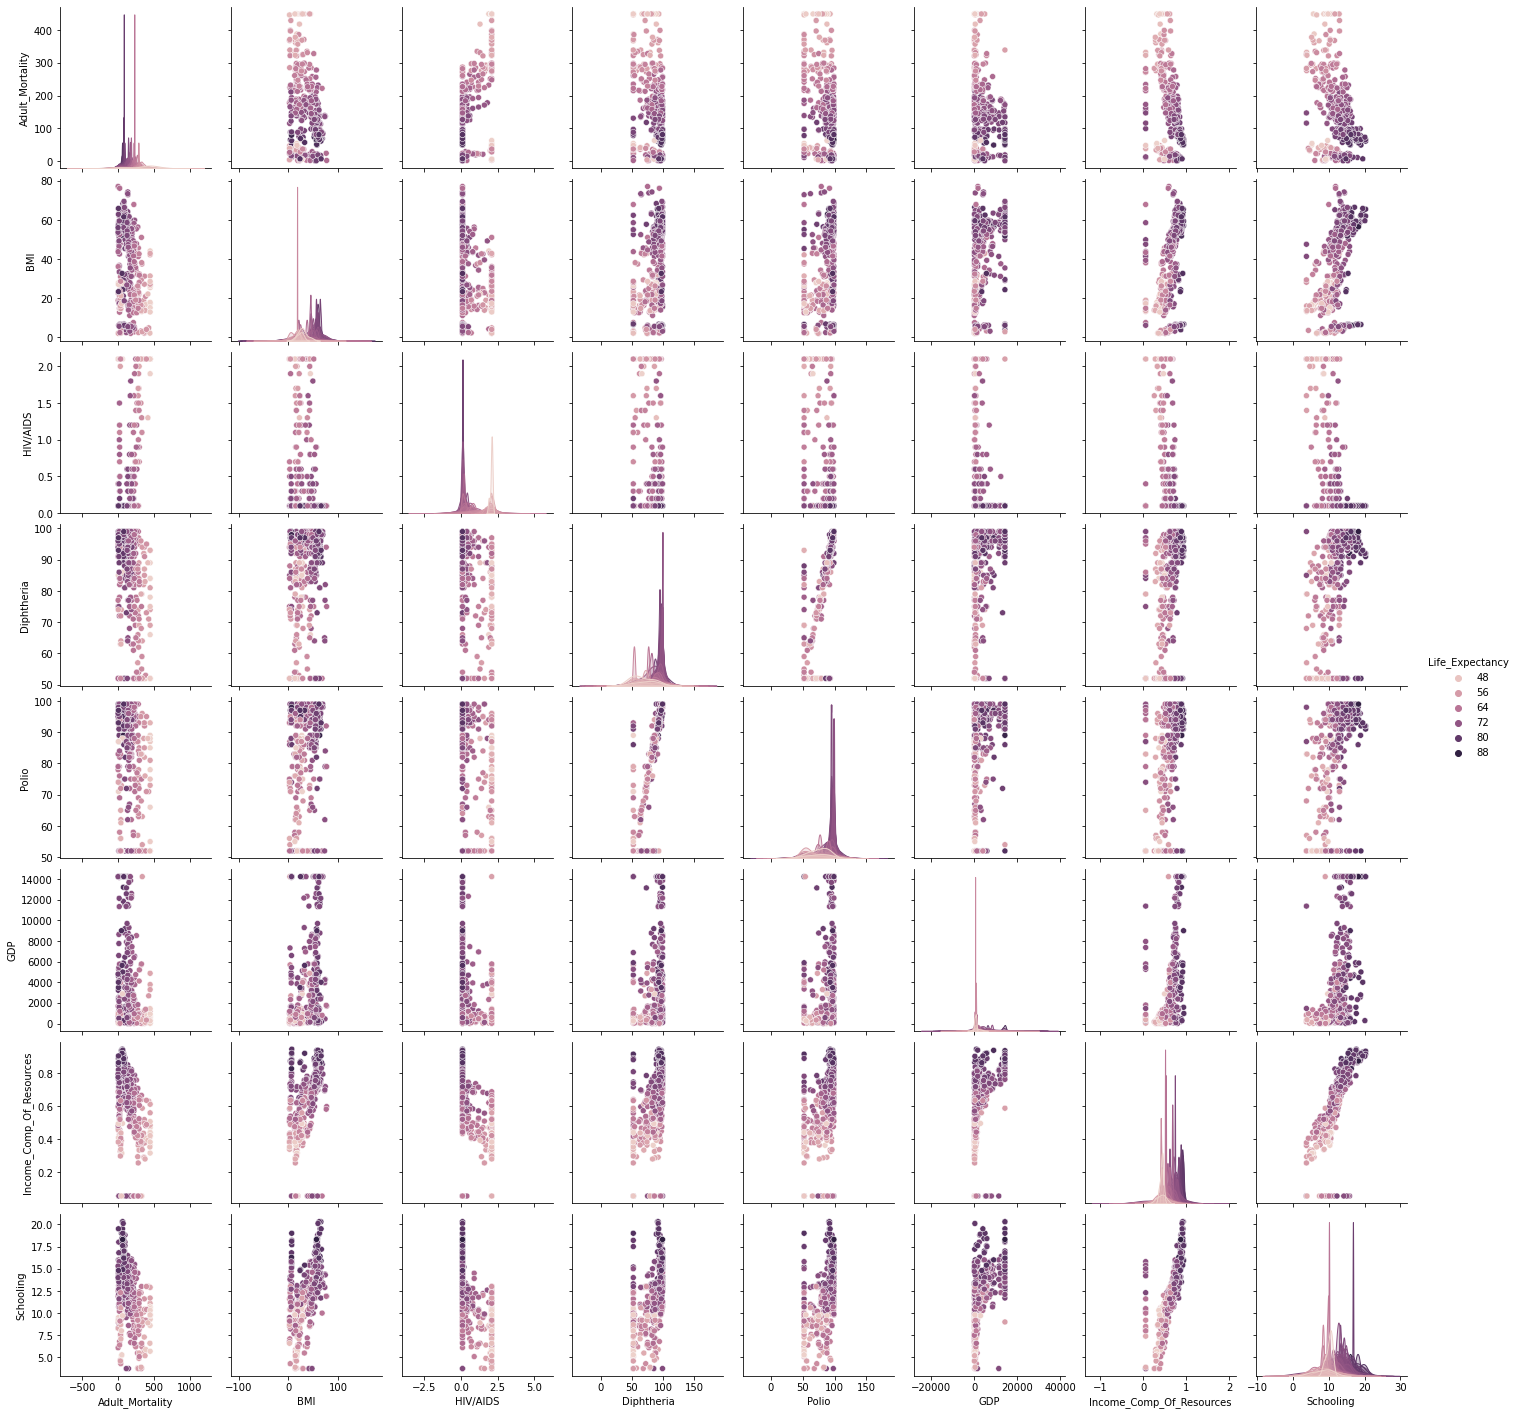

In [29]:
sns.pairplot(test, hue = 'Life_Expectancy')

### Q2 How many numerical features are there?

In [30]:
for column in train:
    if ((train[column].dtype == 'float64')):
        print(column)

Life_Expectancy
Adult_Mortality
BMI
HIV/AIDS
Diphtheria
Polio
GDP
Income_Comp_Of_Resources
Schooling


9  numerical features are there ( 'Life expectancy', 'Adult Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income composition of resources',
       'Schooling')

### Q3 How many categorical features are there?

In [31]:
for column in train:
    if ((train[column].dtype == 'object')):
        print(column)

Status


1 categorical features are there (Status)

### Q4 Which is the third most important feature based on correlation for regression?

Diphtheria

### Q5 Which is the least important feature based on correlation for regression?

Adult Mortality

## ---------------------------------------------------------------------------------------------------------------------------

## Multiple Linear Regression: 

### Train Data

In [32]:
df= train
df.head(5)

,Status,Life_Expectancy,Adult_Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income_Comp_Of_Resources,Schooling
0,Developing,73.3,127.0,43.0,0.90,93.0,86.0,11568.111100,0.741,14.0
1,Developing,56.9,436.0,33.7,1.85,96.0,96.0,5714.479370,0.630,12.1
2,Developing,63.5,241.0,35.0,1.85,84.0,84.0,1862.167274,0.470,6.3
3,Developed,79.4,85.0,57.5,0.10,99.0,99.0,14128.410061,0.880,13.5
4,Developing,74.5,14.0,55.0,0.10,94.0,94.0,3161.529350,0.798,12.0


### LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Status'] = labelencoder.fit_transform(df['Status'])

In [34]:
df

,Status,Life_Expectancy,Adult_Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income_Comp_Of_Resources,Schooling
0,1,73.3,127.0,43.0,0.90,93.0,86.0,11568.111100,0.741,14.0
1,1,56.9,436.0,33.7,1.85,96.0,96.0,5714.479370,0.630,12.1
2,1,63.5,241.0,35.0,1.85,84.0,84.0,1862.167274,0.470,6.3
3,0,79.4,85.0,57.5,0.10,99.0,99.0,14128.410061,0.880,13.5
4,1,74.5,14.0,55.0,0.10,94.0,94.0,3161.529350,0.798,12.0
...,...,...,...,...,...,...,...,...,...,...
1759,1,74.4,111.0,49.2,0.10,85.0,85.0,1657.322800,0.775,15.3
1760,1,63.8,247.0,18.9,1.30,97.0,93.0,617.317648,0.464,10.2
1761,1,69.7,28.0,48.2,1.85,87.0,86.0,3681.599300,0.668,12.6
1762,0,79.7,82.0,57.9,0.10,99.0,96.0,1618.492800,0.877,13.5


### Model

In [35]:
y = df.pop('Life_Expectancy')
X = df
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
pred=lm.predict(x_test)

In [37]:
print("b0: ", lm.intercept_)
print("b1,b2: ", lm.coef_)

b0:  69.53557760453579
b1,b2:  [-0.59035949 -1.78961441  0.54058372 -3.69231822  0.32346577  0.47148549
  0.52638644  1.59512763  1.86515811]


In [38]:
print("Accuracy of LR is = ",lm.score(x_train,y_train))
print("Train R2 Score is = ",r2_score(y_test,pred))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred))

Accuracy of LR is =  0.8394564647475794
Train R2 Score is =  0.8532270962464858
Train Mean Squared Error =  11.865108088186087
Train Mean absolute Squared Error =  2.519612859000474


## - Test Data 

#### Top 5 features

In [39]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(test, 0.559)
len(set(corr_features))
print(corr_features)

{'Diphtheria', 'Polio', 'Income_Comp_Of_Resources', 'Schooling', 'GDP'}


In [40]:
df1 = test
df1.head(5)

,Status,Life_Expectancy,Adult_Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income_Comp_Of_Resources,Schooling
0,Developing,75.7,13.0,59.4,0.1,95.0,95.0,7748.123310,0.738,12.5
1,Developing,69.0,265.0,15.8,0.6,85.0,52.0,274.819723,0.473,8.9
2,Developing,72.6,11.0,45.0,0.1,97.0,97.0,1175.788981,0.656,10.7
3,Developing,73.7,133.0,32.5,0.1,97.0,97.0,7269.171140,0.736,12.3
4,Developing,63.3,241.0,16.4,1.2,69.0,52.0,468.567249,0.422,8.4


In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['Status'] = labelencoder.fit_transform(df1['Status'])

In [42]:
y = df1.pop('Life_Expectancy')
X = df1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [43]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
pred=lm.predict(x_test)

In [44]:
print("b0: ", lm.intercept_)
print("b1,b2: ", lm.coef_)

b0:  60.6379952681407
b1,b2:  [-1.76835526e+00 -1.48211095e-02  1.44370059e-02 -5.10223410e+00
  9.70860251e-02 -5.50736437e-02  1.72931729e-04  7.44670706e+00
  4.86227219e-01]


## --------------------------------------------------------------------------------------------------------
1. What is mean_squared_error for the test dataset?
2. What is r2_score for the test dataset?
3. What is the mean absolute error for the test dataset?
4. What is the value of cost function on the train and test dataset for the model previously trained?


In [45]:
print("Accuracy of LR is = ",lm.score(x_train,y_train))
print("test R2 Score is = ",r2_score(y_test,pred))
print("test Mean Squared Error = ",mean_squared_error(y_test,pred))
print("test Mean absolute Squared Error = ",mean_absolute_error(y_test,pred))

Accuracy of LR is =  0.8627525739828396
test R2 Score is =  0.8301305103745987
test Mean Squared Error =  14.224365806190633
test Mean absolute Squared Error =  2.8087387465696456


## -----------------------------------------------------------------------------------

- What is the predicted Life expectancy for the following countries?
     a. Case 1
        i. Status=Developing
        ii. Adult Mortality = 730
        iii. BMI = 27
        iv. HIV/AIDS = 33
        v. Diphtheria=70
        vi. Polio =60
        vii. GDP=450
        viii. Income composition of resources = 0.35
        ix. Schooling=10
     b. Case 2
        i. Status=Developed
        ii. Adult Mortality = 100
        iii. BMI = 20
        iv. HIV/AIDS = 1
        v. Diphtheria=7
        vi. Polio =6
        vii. GDP=4500
        viii. Income composition of resources = 0.5
        ix. Schooling=12


In [46]:
import pandas as pd
  
data = [[1,730,27,33,70,60,450,0.35,10],[0,100,20,1,7,6,4500,0.5,12]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Status','Adult Mortality','BMI','HIV/AIDS','Diphtheria','Polio','GDP'
                                 ,'Income composition of resources','Schooling'])
  
# print dataframe.
df

,Status,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,1,730,27,33,70,60,450,0.35,10
1,0,100,20,1,7,6,4500,0.50,12


In [47]:
model.predict(df)

array([-108.89565395,   65.02782359])

#### 5. What is mean_squared_error for the test dataset after we take top 5 features based on correlation?
#### 6. What is r2_score for the test dataset after we take the top 5 features based on correlation?

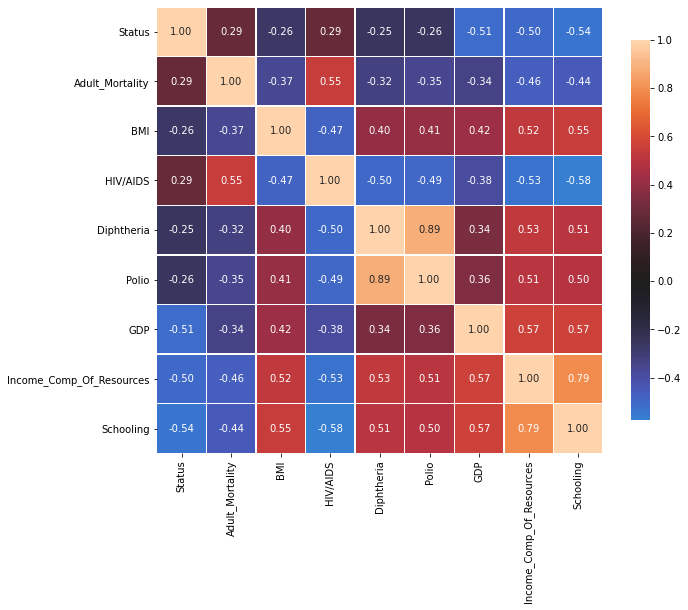

In [48]:
def correlation_heatmap(test):
    correlations = test.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(test)

In [50]:
y = y
X = df1[['Income_Comp_Of_Resources', 'GDP', 'Diphtheria', 'Schooling', 'Polio']]
# ['Status','Diphtheria', 'Polio', 'HIV/AIDS','BMI']
# y

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

lm = LinearRegression()
model = lm.fit(x_train,y_train)
pred=lm.predict(x_test)

print("test Mean Squared Error = ",mean_squared_error(y_test,pred))
print("Test R2 Score is = ",r2_score(y_test,pred))

test Mean Squared Error =  33.387954204459895
Test R2 Score is =  0.6012760907850443
